**REGRESSION TEAM TS1**


---

## Table of Contents <a class="anchor" id="Table_of_Contents"></a>

* [Table of Contents](#Table_of_Contents)
* [Introduction](#Intro)
  * [Problem Statement](#Problem_Statement)
  * [Background/Context](#Background_Context)
  * [Supervised Learning as a Problem Solving Tool](#SL_as_Tool)
  * [Interplay Between Human Expertise and Regression Model](#Human_Model_Interaction)
* [Packages](#Packages)
  * [Importing Packages for Exploratory Data Analysis](#Importing_Packages)
* [Data Import and Inspection](#Data_Import)
* [Data Transformation](#Data_Transform)
* [Exploratory Data Analysis](#EDA)
  * [Univariate Analysis - Numerical Features](#Univariate_Numerical)
  * [Univariate Analysis - CategoricalFeatures](#Univariate_Categorical)
  * [Multivariate Analysis](#Multivariate_Analysis)
  * [Insight on the EDA](#EDA_Insight)
* [Data Cleaning/Dealing with Outliers](#Data_Cleaning)
* [Feature Selection and Engineering](#Feature_Selection)
  * [Dummy Variable Encoding](#Dummy_Encoding)
  * [Correlation and Variable Selection](#Variable_Selection)
* [Regression Model](#Regression_Model)
  * [Model Import and Instantiation](#Model_Import)
  * [Model Training](#Model_Training)
  * [Model Testing](#Model_Testing)
  * [Model Prediction](#Model_Prediction)
  * [Model Performance Evaluation](#Model_Evaluation)
* [Final Comments](#Final_Comments)

# **INTRODUCTION** <a class="anchor" id="Intro"></a>

**PROBLEM STATEMENT** <a class="anchor" id="Problem_Statement"></a>

There is a need within the apple industry to be able to accurately predict how to set the price per kilogram of golden delicious apples.

**BACKGROUND/CONTEXT** <a class="anchor" id="Background_Context"></a>

The apple industry, like many other fresh produce sectors, faces a delicate balance between supply and demand and how to set their prices accordingly. If prices are set too low, profit will fall, whilst if prices are set to high, then there is the risk of apple sales not being high enough. The knock on effect of poor sales is that a large volume of stock goes to waste.

We have access to dataset containing multiple numerical and categorical features. Using these variables, we are going to train a supervised regression model which will aim to accurately predict the price of golden delicious apples per kilogram, given a set of features.

**SUPERVISED LEARNING AS A PROBLEM SOLVING TOOL** <a class="anchor" id="SL_as_Tool"></a>

We will be building a regression model, through supervised learning, in order to accurately predict the recommended average price per kilogram of golden delicious apples in the coming years. The average price/ target variable will be shifted depending on the value(s) of a select number of numerical and categorical features.

While no model can accurately predict every outcome with one hundred percent certainty, a well trained and a well evaluated model can provide appropriate estimations of the target variable. 

**INTERPLAY BETWEEN HUMAN EXPERTISE AND REGRESSION MODEL** <a class="anchor" id="Human_Model_Interaction"></a>

No regression model, no matter how complex or accurate, should serve as the absolute decision maker when deciding on business strategy. Well trained machine learning models can definitely provide valuable insights into the interactions of key variables but they cannot replace industry expertise.

For example, the regression model below may give insight into how a categorical variable may affect the average price of apples but experienced farmers, retailers and distributors in the apple industry receive this information and choose to not implement the recommended price shifting due to their own expertise in the field. 

Furthermore, apple farmers could be consulted in order to identify more potential dependent variables that could potentially play a key role in affecting the target variable. This would also involve having access to the right, clean and pre-processed data.

# **PACKAGES** <a class="anchor" id="Packages"></a>

IMPORTING PACKAGES FOR EXPLORATORY DATA ANALYSIS <a class="anchor" id="Importing_Packages"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

#import missingno
from scipy import stats
import math
import pickle
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

MORE PACKAGES WILL BE IMPORTED FOR THE REGRESSION MODEL(S)

# **DATA IMPORT AND INSPECTION** <a class="anchor" id="Data_Import"></a>

In [2]:
df_train = pd.read_csv('Downloads/df-train_set.csv')
df_test = pd.read_csv('Downloads/df-test_set.csv')

Before analysing the data, it is imperative to examine the dataset for any notable anomalies. 
We begin by assesing the shape (number of rows and columns) of the dataframe, as well as data type of each column. It is also useful to call the .head() on the dataframe in order to glance at the first five rows.

In [3]:
df_train.shape

(64376, 13)

In [4]:
df_test.shape

(685, 13)

The training dataframe contains **64376** rows and **13** columns. One of these columns is the target variable - average price of a kilogram of apples - and thus there are **12** feature variables. The test data contains **685** rows and **13** columns

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


Here we can see that we contain both numerical and categorical feature variables. Numerical and feature variables will get subjected to different Exploratory Data Analysis techniques.

The categorical feature columns are 

```
Province, Container, Size_Grade and Commodities.

```
Meanwhile, the numerical feature columns are 

```
Weight_Kg, Low_Price, High_Price, Sales_Total, Total_Qty_Sold, Total_Kg_Sold, Stock_On_Hand, avg_price_per_kg, 
```
Furthermore, the column 

```
Date
```
can be a useful feature in order to track the interplay of other features interacting over time.






In [6]:
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [7]:
df_test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


Lastly, we want to check as to whether there is any missing/null data entries


In [8]:
df_train.isnull().sum() # allows us to view the number of missing data values per column()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [9]:
df_test.isnull().sum()

Index             0
Province          0
Container         0
Size_Grade        0
Weight_Kg         0
Commodities       0
Date              0
Low_Price         0
High_Price        0
Sales_Total       0
Total_Qty_Sold    0
Total_Kg_Sold     0
Stock_On_Hand     0
dtype: int64

From the test set we can see that the Commodities only contain the APPLE GOLDEN DELICIOUS. Therefore we can subset the training data to follow the same suit.

In [10]:
golden_apple_train = df_train[df_train.Commodities == 'APPLE GOLDEN DELICIOUS']
golden_apple_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Commodities       1952 non-null   object 
 5   Date              1952 non-null   object 
 6   Low_Price         1952 non-null   float64
 7   High_Price        1952 non-null   float64
 8   Sales_Total       1952 non-null   float64
 9   Total_Qty_Sold    1952 non-null   int64  
 10  Total_Kg_Sold     1952 non-null   float64
 11  Stock_On_Hand     1952 non-null   int64  
 12  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 213.5+ KB


# **DATA TRANSFORMATION** <a class="anchor" id="Data_Transform"></a>

Currently, the data in the Date column is in string format. It is conventional then, to convert this data to datetime format. Furthermore, it may prove useful to aggregate this datetime data into quarterly and monthly data. This can be achieved by creating new columns for these attributes.

In [11]:
#Getting the months and quarters for the dates
golden_apple_train.date = pd.to_datetime(golden_apple_train.Date) # Converts the data to datetime format
golden_apple_train["Quarter"] = golden_apple_train.date.dt.quarter # Creates a new columns with quarter data values
golden_apple_train["Month"] = golden_apple_train.date.dt.month # Creates a new column with month data values
golden_apple_train["Year_Month"] = golden_apple_train.date.dt.year

golden_apple_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month,Year_Month
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51,3,9,2020
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,2,4,2020
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11,2,4,2020
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51,2,5,2020
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50,3,9,2020


There is no need, now, to retain the 'Date' column. Therefore, it is dropped in the cell below.

In [12]:
golden_apple_train = golden_apple_train.drop('Date', axis=1)
golden_apple_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month,Year_Month
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,150.0,170.0,51710.0,332,6075.6,822,8.51,3,9,2020
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,50.0,50.0,16000.0,320,3520.0,0,4.55,2,4,2020
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,55.0,55.0,990.0,18,162.0,1506,6.11,2,4,2020
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,80.0,120.0,32020.0,388,7100.4,443,4.51,2,5,2020
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,1800.0,1800.0,1800.0,1,400.0,2,4.50,3,9,2020


We wish to also be able to assess whether the season when which the observation was made has any bearing on the avg_price_per_kg. In order to to this, we create a function, season(), which uses the transformed date values to assign each month to its respective season.

In [13]:
"""This function, season() takes the integer value of each month and uses this integer value to assign each observation to one
of the four seasons."""

def season(df):
    
    
    season = []

    for month in df['Month']:
        
         if 3 <= month <= 5:
                
            season.append('Autumn')

         if 6 <= month <= 8:
            season.append('Winter')

         if 9 <= month <= 11:
            season.append('Spring')

         if month == 1:
            season.append('Summer')

         if month == 2:
            season.append('Summer')

         if month == 12:
            season.append('Summer')

  

    df['Season'] = season

    return df

In [14]:
golden_apple_train = season(golden_apple_train) # Applying the newly defined function to the training data.
golden_apple_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month,Year_Month,Season
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,150.0,170.0,51710.0,332,6075.6,822,8.51,3,9,2020,Spring
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,50.0,50.0,16000.0,320,3520.0,0,4.55,2,4,2020,Autumn
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,55.0,55.0,990.0,18,162.0,1506,6.11,2,4,2020,Autumn
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,80.0,120.0,32020.0,388,7100.4,443,4.51,2,5,2020,Autumn
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,1800.0,1800.0,1800.0,1,400.0,2,4.50,3,9,2020,Spring


The above feature engineering steps are then applied to the testing dataset.

In [15]:
golden_apple_test = df_test
golden_apple_test.Date = pd.to_datetime(golden_apple_test['Date'])
golden_apple_test["Quarter"] = golden_apple_test.Date.dt.quarter 
golden_apple_test["Month"] = golden_apple_test.Date.dt.month 
golden_apple_test = season(golden_apple_test)
golden_apple_test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Quarter,Month,Season
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0,3,7,Winter
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2,1,1,Summer
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45,3,8,Winter
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8,2,5,Autumn
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19,2,5,Autumn


## TARGET VARIABLE IDENTIFICATION

The target variable is the average price of the golden delicious apples.

# **EXPLORATORY DATA ANALYSIS** <a class="anchor" id="EDA"></a>


Exploratory Data Analysis (EDA) is a vitally important step in the Data Science Process. EDA consists of comprehensively examining the dataset before using the the dataset in training a model. The core of EDA involves identifying key relationships that exist between features in the dataset and how these features interact to alter the target variable.
EDA includes performing univariate and multivariate analysis using a myriad of statistical and data visualisation techniques.




## UNIVARIATE ANALYSIS - NUMERICAL FEATURES <a class="anchor" id="Univariate_Numerical"></a>


Univariate EDA entails assesing each variable individually (both in a graphical and non-graphical sense). Non-graphically univariate EDA methods include exploring the spread of the numerical features.

By calling 

```
df.describe()

```
we are given a comprehensive breakdown of several key summary statistics of each numerical feature.



In [16]:
golden_apple_train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month,Year_Month
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893,2.239754,5.609119,2019.968238
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744,0.908357,2.687248,0.175412
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000,1.000000,1.000000,2019.000000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000,1.000000,3.000000,2020.000000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000,2.000000,6.000000,2020.000000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000,3.000000,7.000000,2020.000000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000,4.000000,12.000000,2020.000000


In [17]:
golden_apple_train.quantile(0.85)

Weight_Kg              18.30
Low_Price             160.00
High_Price            180.00
Sales_Total         37320.00
Total_Qty_Sold        339.70
Total_Kg_Sold        5380.20
Stock_On_Hand         793.35
avg_price_per_kg        9.15
Quarter                 3.00
Month                   8.00
Year_Month           2020.00
Name: 0.85, dtype: float64

The 25%, 50% and 75% metrics relate to the 25th, median and 75th percentiles respectively. It is important to not directly compare the means ( and other summary metrics) between different variables. At least not performing any standardisation first. 

Additionally, there are two further metrics that can be calculated. 

```
df.skew()
```
allows one to assess whether a numerical feature is skewed either to the left or right (i.e not normally distributed/symetrical about the median). Whilst

```
df.curtosis()
```
allows one to evaluate whether or not there is a high prevelance of outliers present in each of the numerical features.




In [18]:
golden_apple_train.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
Quarter            -0.112794
Month               0.078651
Year_Month         -5.344208
dtype: float64

Here we can see that each numerical feature has a skew value of greater than 1. Thus each variable can be deemed to be significantly skewed to the right.

In [19]:
golden_apple_train.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
Quarter             -1.175297
Month               -0.620111
Year_Month          26.587803
dtype: float64

It can be assumed, based on the above skewness and kurtosis numbers that these numerical features have a high prevelance of outliers. However, further analysis in a graphical form is required.

## GRAPHICAL UNIVARIATE ANALYSIS - HISTOGRAM


In order to view each numerical feature in a seperate graph but without having to write code for each seperate numerical feature, we create a list containing the names of all of the relevant numerical columns.

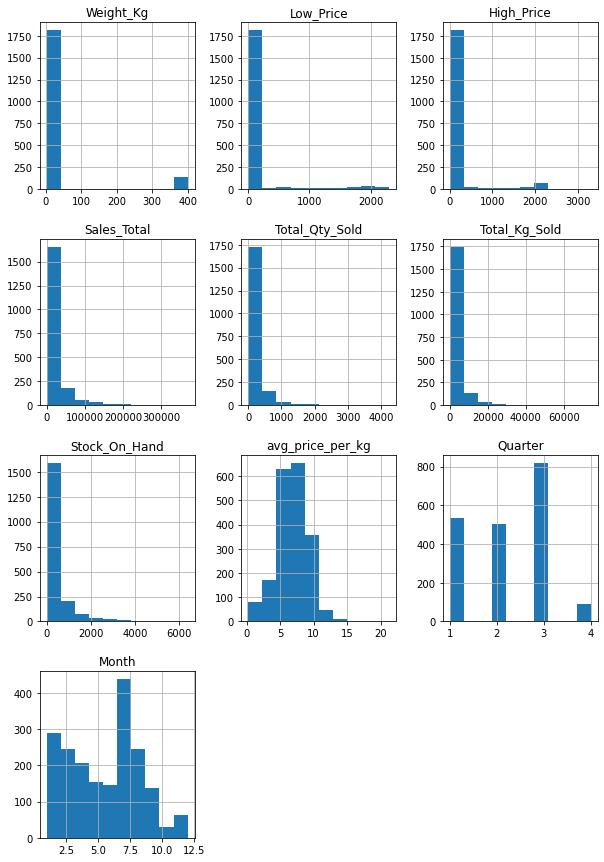

In [20]:
num_features = ['Weight_Kg', 
                'Low_Price', 
                'High_Price', 
                'Sales_Total', 
                'Total_Qty_Sold', 
                'Total_Kg_Sold', 
                'Stock_On_Hand', 
                'avg_price_per_kg', 
                'Quarter', 
                'Month']

golden_apple_train[num_features].hist(figsize=(10,15), sharex=False)
plt.show()

## DISTRIBUTION PLOT

Addtionally, we can create distribution plots to accompany the above histograms for the numerical features.

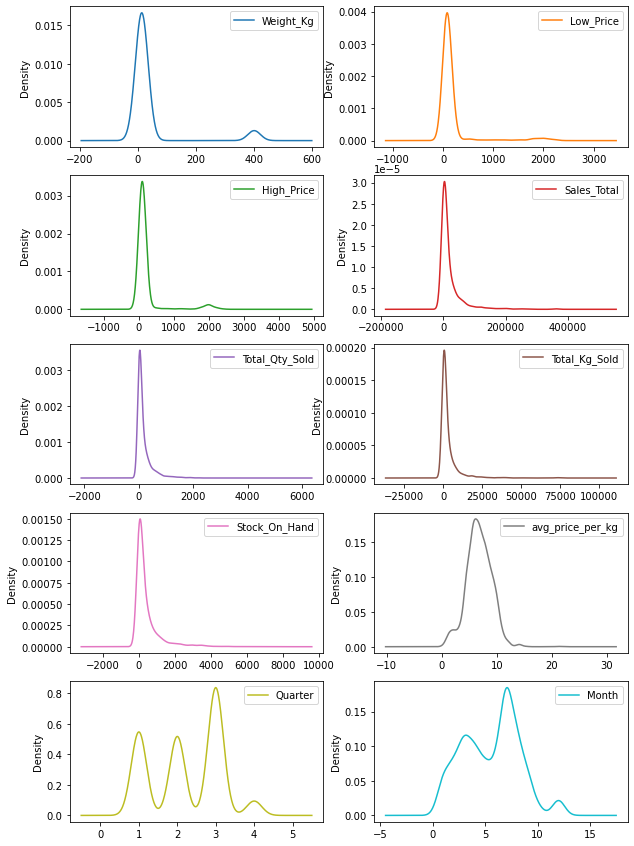

In [21]:
golden_apple_train[num_features].plot(kind='density', subplots=True, layout=(5,2), sharex=False, figsize=(10,15)) # Creates the distribtuion plots, using matplotplib.pyplot, for each numerical feature
plt.show()

## **UNIVARIATE ANALYSIS - CATEGORICAL ANALYSIS** <a class="anchor" id="Univariate_Categorical"></a>

## BAR CHART

A common EDA method for categorical features is to create countplots and bar charts, generally depending on the specific data type of the feature in question.

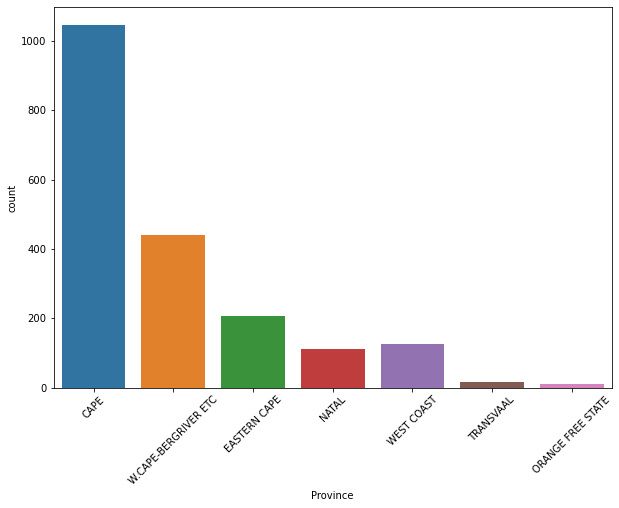

In [22]:
plt.subplots(figsize=(10,7)) # This increases the size of the chart.
sns.countplot(x='Province', data=golden_apple_train) # Creates a count of the no. of observations located in each province.
plt.xticks(rotation=45) # Rotates the labels on x-axis to make them more reader-friendly.
plt.show()

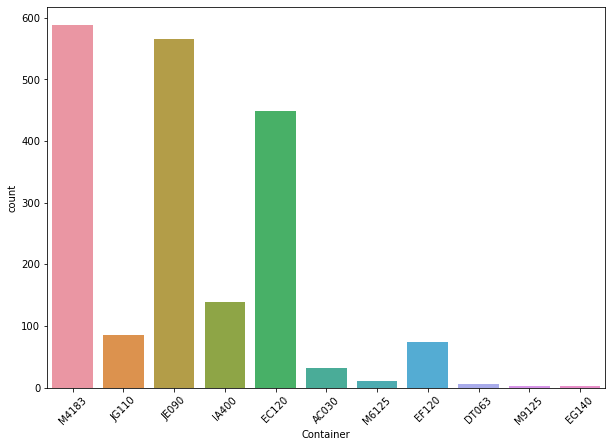

In [23]:
plt.subplots(figsize=(10,7)) # This increases the size of countplot.
sns.countplot(x='Container', data=golden_apple_train) # Creates a countplot of the no. of observations using the various container types
plt.xticks(rotation=45)
plt.show()

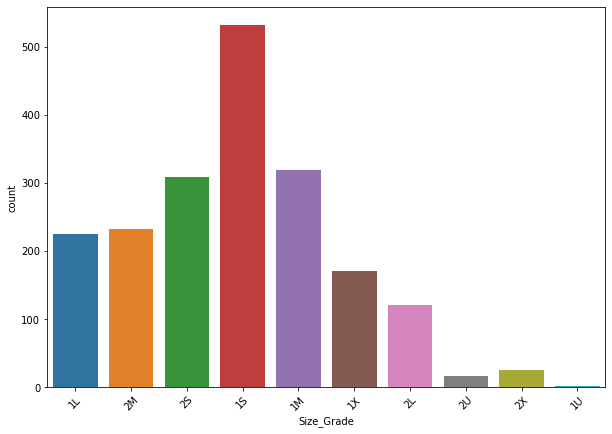

In [24]:
plt.subplots(figsize=(10,7)) # This increases the size of the countplot.
sns.countplot(x='Size_Grade', data=golden_apple_train) # Creates a countplot of the no. of observations corresponding to each size grade
plt.xticks(rotation=45)
plt.show()

## **MULTIVARIATE ANALYSIS** <a class="anchor" id="Multivariate_Analysis"></a>


Multivariate EDA entails exploring and assessing any potential relationships between features. 

**Non-graphical multivariate** analysis involves finding the correlation coefficients between all relevant numerical features.

The Pearson's correlation coeffiecient is a common correlation metric used to make an inital assessment of the relationship between two numerical variables in a dataset.

In [25]:
golden_apple_train.corr() # This will return a matrix of Pearson Correlation Coefficients between all numerical feature.

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month,Year_Month
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886,0.042958,0.047613,-0.019772
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740,0.024559,0.039084,-0.021276
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496,0.039385,0.047717,-0.018911
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473,-0.040985,-0.055853,0.031264
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536,-0.037732,-0.058639,0.042132
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007,-0.005622,-0.023098,0.030462
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028,-0.027354,-0.011749,-0.045846
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000,-0.022305,0.005205,-0.135526
Quarter,0.042958,0.024559,0.039385,-0.040985,-0.037732,-0.005622,-0.027354,-0.022305,1.000000,0.952036,-0.351069
Month,0.047613,0.039084,0.047717,-0.055853,-0.058639,-0.023098,-0.011749,0.005205,0.952036,1.000000,-0.430853


## GRAPHICAL MULTIVARIATE ANALYSIS - HEATMAP

A convential way to begin **graphical multivariate** analysis is to construct a heatmap displaying the Pearson Ciorrelation Coefficient between **numerical features**

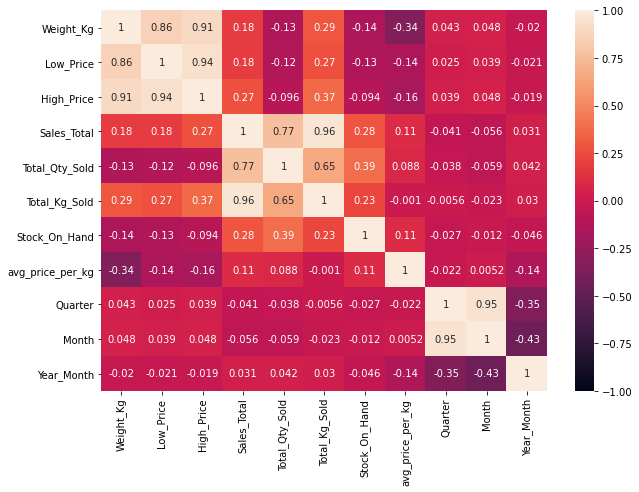

In [26]:
f, ax = plt.subplots(figsize=(10, 7)) # This increases the size of the Seaborn Heatmap.
sns.heatmap(golden_apple_train.corr(), vmin=-1, vmax=1, annot=True) # Creates a Heatmap using seaborn
plt.show() 

## PAIRPLOT

Seaborn provides users with a myriad of visualisations. One such being the Pairplot. This produces a matrix which contains a scatterplot for every possible combination of numerical features in the dataset.

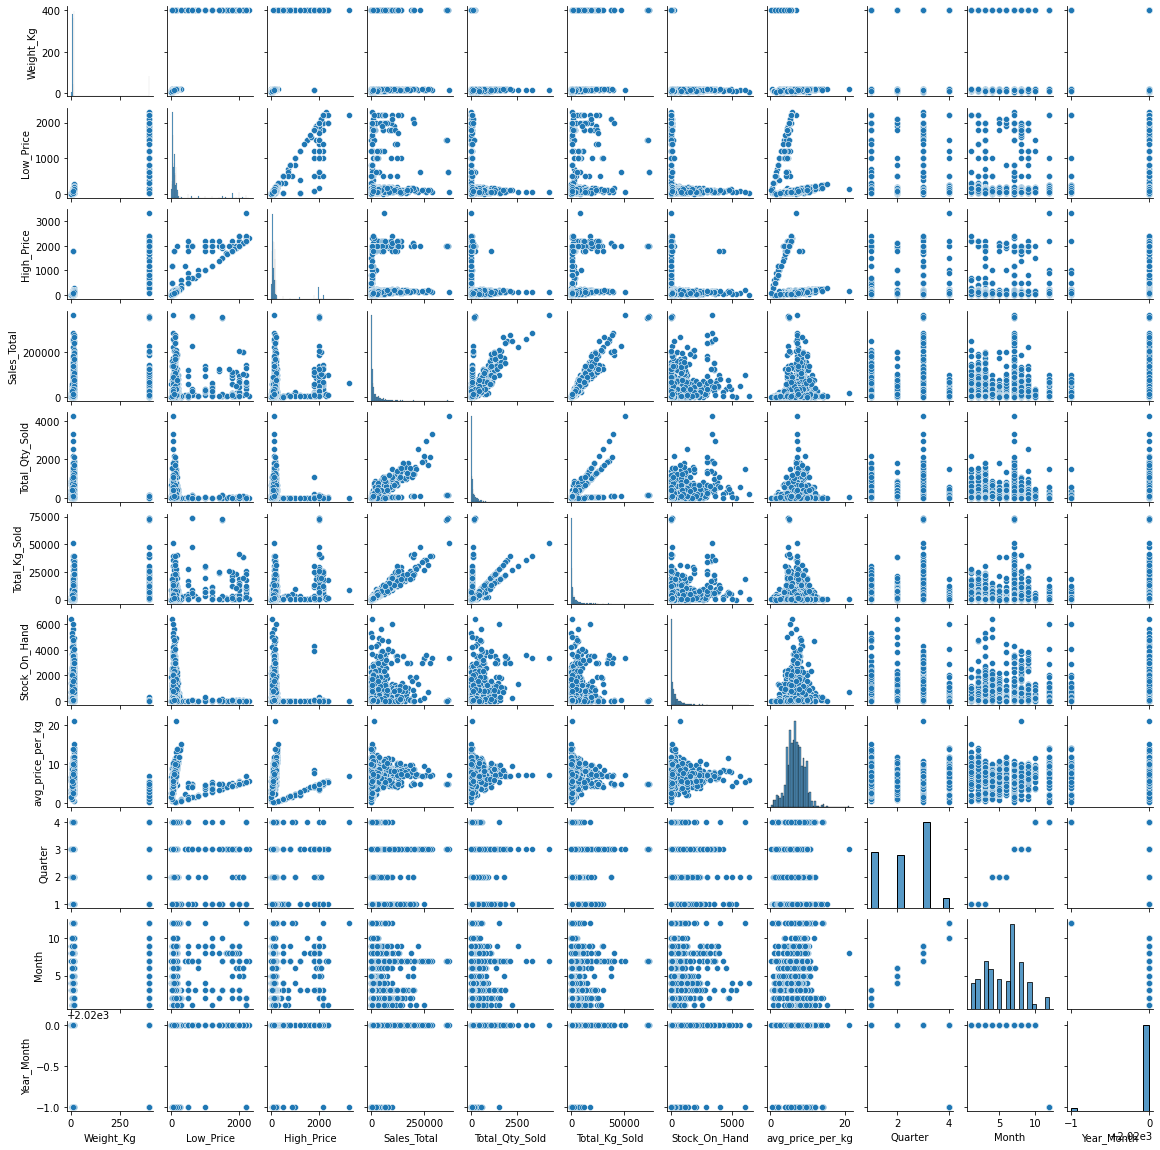

In [27]:
g = sns.pairplot(golden_apple_train) # Creates a Pairplot using Seaborn
g.fig.set_size_inches(16,16) #This increases the size of the pariplot
plt.show()

While there are many scatterplots in the above pairplot matrix, very few plots seem to be showing potential linear relationships between variables. For example, Sales_Total and Total_Kg_Sold appear to have a reasonably sound positive linear relationship. However, even in the this scatterplot, there are a couple of deviating lines towards the top right corner. Additionally, one would expect Sales_Total and Total_Kg_sold to be positvely correlated regardless of what the target variable is.

It looks as though the target variable, avg_price_per_kg, may have a linear relationship with both Quarter and Month which could be explored further


## SCATTERPLOT

The Scatterplot function function is great for assessing whether there is likely to be any linear relationship between two variable. Conveniently, the sns.scatterplot() fucntion has a hue argument which allows the addition of a third variable. The variable chosen often tends to be a categorical feature. Thus we can visualise the potential interplay of two numerical features with a third categorical feature. 

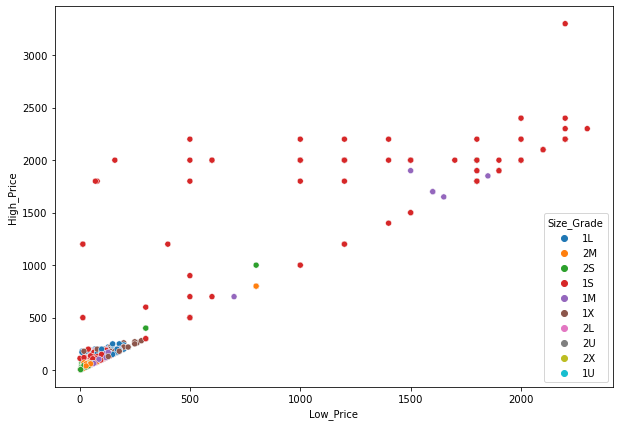

In [28]:
plt.subplots(figsize=(10,7))
sns.scatterplot(x='Low_Price', y='High_Price', hue='Size_Grade', data=golden_apple_train) # Creates a Scatterplot using Seaborn
plt.show()

Unfortunately, we cannot read too much into this scatterplot as the relationship is not linear. Unless, we perform data cleaning to remove all High_Price values above 400 units or so.

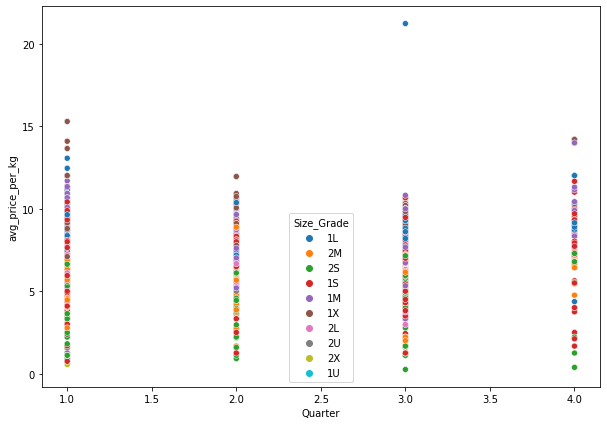

In [29]:
plt.subplots(figsize=(10,7)) # This increases the size of the Scatter plot
sns.scatterplot(x='Quarter', y='avg_price_per_kg', hue='Size_Grade', data=golden_apple_train)
plt.show()

This Scatterplot allows us to visualise that there is perhaps a positive quadratic relationship between Quarter ( an indication of the time of year) and the target variable.

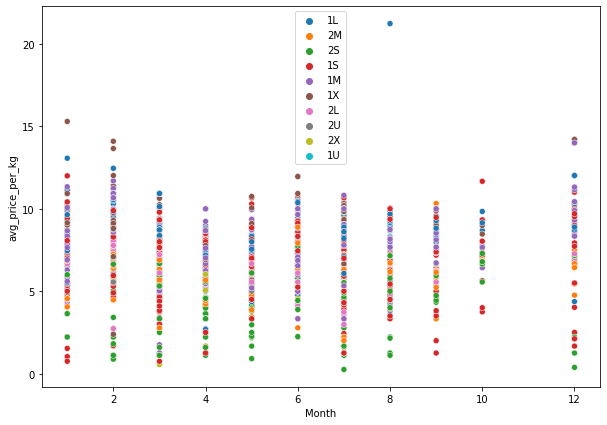

In [30]:
plt.subplots(figsize=(10,7))
sns.scatterplot(x='Month', y='avg_price_per_kg', hue='Size_Grade', data=golden_apple_train)
plt.legend(loc='best')
plt.show()

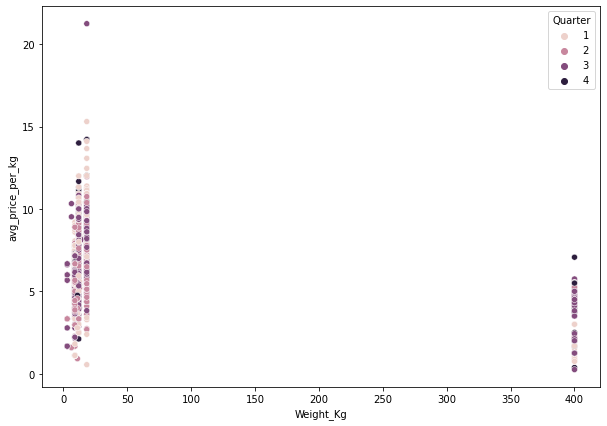

In [31]:
plt.subplots(figsize=(10,7)) # This increases the size of the Scatter plot
sns.scatterplot(x='Weight_Kg', y='avg_price_per_kg', hue='Quarter', data=golden_apple_train)
plt.show()

Due to the heavy contingent of outliers at 400 kg, it is very difficult to know if there could be a linear relationship between these two variables.

## **INSIGHT ON THE EDA** <a class="anchor" id="EDA_Insight"></a>

With the data in this current form, it is very difficult to pin down potential linear relationships to explore further. Thus it makes selecting key predictor variables in order to construct a linear model very challenging. There are definitely predictor variables within this given dataset, they just need to be . This is without any further data cleaning or feature engineering.

Thus, we will attempt to create dummy variables in order to run the categorical data into numeric data. This means that the Container values will carry a specific integer based on their container type name.

# **DATA CLEANING/DEALING WITH OUTLIERS** <a class="anchor" id="Data_Cleaning"></a>


# **FEATURE SELECTION AND ENGINEERING** <a class="anchor" id="Feature_Selection"></a>


<AxesSubplot:xlabel='avg_price_per_kg', ylabel='Density'>

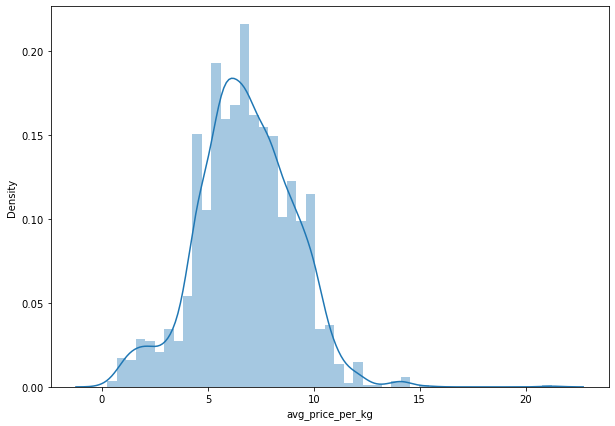

In [32]:
plt.subplots(figsize=(10,7)) # This increases the size of the Distribution Plot.
sns.distplot(golden_apple_train['avg_price_per_kg'], kde=True)


## DUMMY VARIABLE ENCODING <a class="anchor" id="Dummy_Encoding"></a>


Dummy variable encoding, particularly on a dataset such as this one, is vitally important.

Firstly, most of the numerical features appear to have high levels of outliers, which is skewing the visualisation of the potential relationship that these features may be having without target variable. Thus we have to look at the effects of the categorical features, in conjunction with the numerical features, on the target variable so as to build an informative regression model.

Secondly, regression models cannot make sense of string/text data. Therefore this string, categorical data simply has to be converetd into dummy encoded variables in order for the data to be analysed.

In [33]:
dummy_df = pd.get_dummies(golden_apple_train, drop_first=True)
dummy_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month,...,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Season_Spring,Season_Summer,Season_Winter
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,3,9,...,0,0,0,0,0,0,0,1,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,2,4,...,0,0,0,1,0,0,0,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,2,4,...,0,0,0,0,1,0,0,0,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,2,5,...,0,0,0,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,3,9,...,0,0,0,0,0,0,0,1,0,0


We expect to see many more columns compared to the number of columns in the golden_apple_train dataset.

In [34]:
dummy_df.columns 

Index(['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'avg_price_per_kg', 'Quarter',
       'Month', 'Year_Month', 'Province_EASTERN CAPE', 'Province_NATAL',
       'Province_ORANGE FREE STATE', 'Province_TRANSVAAL',
       'Province_W.CAPE-BERGRIVER ETC', 'Province_WEST COAST',
       'Container_DT063', 'Container_EC120', 'Container_EF120',
       'Container_EG140', 'Container_IA400', 'Container_JE090',
       'Container_JG110', 'Container_M4183', 'Container_M6125',
       'Container_M9125', 'Size_Grade_1M', 'Size_Grade_1S', 'Size_Grade_1U',
       'Size_Grade_1X', 'Size_Grade_2L', 'Size_Grade_2M', 'Size_Grade_2S',
       'Size_Grade_2U', 'Size_Grade_2X', 'Season_Spring', 'Season_Summer',
       'Season_Winter'],
      dtype='object')

Additionally, we will encode for dummy variables on the test dataset.

In [35]:
dummy_df_test = pd.get_dummies(golden_apple_test, drop_first=True)

## VARIABLE SELECTION BY CORRELATION AND SIGNIFICANCE <a class="anchor" id="Variable_Selection"></a>


Variable selection seeks to remove features which do not aid in the performance of a regression model. 
By making this selection, based off of how a feature correlates with the target variable (and the probability associated with this correlation) we aim to reduce multicollinearity in the training data set. Multicollinearity is the result of feature variables which interact with one another, thus making it hard to discern the true underlying efftct of either variable on the outcome variable, thus weakening the relevance of the trained regression model.

In [36]:
column_titles = [col for col in dummy_df.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
dummy_df=dummy_df.reindex(columns=column_titles)

dummy_df_feature_select = dummy_df.copy() # creates a copy of dataframe for the purpose of performing feature selection

In [37]:
y_data_fs = dummy_df_feature_select['avg_price_per_kg']

x_data_fs = dummy_df_feature_select.drop('avg_price_per_kg', axis=1)

In [38]:
corrs = dummy_df_feature_select.corr()['avg_price_per_kg'].sort_values(ascending=False)
corrs

avg_price_per_kg                 1.000000
Container_M4183                  0.403229
Province_W.CAPE-BERGRIVER ETC    0.262051
Size_Grade_1X                    0.251451
Container_EC120                  0.188162
Season_Summer                    0.185013
Size_Grade_1M                    0.175779
Container_EF120                  0.114297
Sales_Total                      0.108473
Stock_On_Hand                    0.105028
Total_Qty_Sold                   0.087536
Season_Spring                    0.026971
Container_EG140                  0.023753
Container_M6125                  0.007568
Month                            0.005205
Container_M9125                  0.002812
Total_Kg_Sold                   -0.001007
Province_TRANSVAAL              -0.020415
Quarter                         -0.022305
Province_ORANGE FREE STATE      -0.025026
Province_WEST COAST             -0.025122
Size_Grade_1U                   -0.027335
Size_Grade_1S                   -0.028506
Size_Grade_2X                   -0

In [39]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                
    return col_corr

In [40]:
corr_features = correlation(x_data_fs, 0.7)
len(set(corr_features))

6

In [41]:
corr_features

{'Container_IA400',
 'High_Price',
 'Low_Price',
 'Month',
 'Total_Kg_Sold',
 'Total_Qty_Sold'}

Calculating p significance associated with each pearson correlation coefficient.

In [42]:
from scipy.stats import pearsonr

column_names = [col for col in corrs.index if col != 'avg_price_per_kg']

dict_cp = {}

for col in column_names:
    p_val = np.round(pearsonr(dummy_df_feature_select[col], dummy_df_feature_select['avg_price_per_kg'])[1], 4)
    dict_cp[col] = {'Correlation_Coefficient': corrs[col], 'P_Value': p_val}
    
corr_p_df = pd.DataFrame(dict_cp).T

corr_p_df


,Correlation_Coefficient,P_Value
Container_M4183,0.403229,0.0000
Province_W.CAPE-BERGRIVER ETC,0.262051,0.0000
Size_Grade_1X,0.251451,0.0000
Container_EC120,0.188162,0.0000
Season_Summer,0.185013,0.0000
Size_Grade_1M,0.175779,0.0000
Container_EF120,0.114297,0.0000
Sales_Total,0.108473,0.0000
Stock_On_Hand,0.105028,0.0000
Total_Qty_Sold,0.087536,0.0001


In [43]:
x_names_corr = list(corr_p_df[corr_p_df['P_Value'] < 0.05].index)

X_data_corr = dummy_df_feature_select[x_names_corr]

In [44]:
x_names_corr

['Container_M4183',
 'Province_W.CAPE-BERGRIVER ETC',
 'Size_Grade_1X',
 'Container_EC120',
 'Season_Summer',
 'Size_Grade_1M',
 'Container_EF120',
 'Sales_Total',
 'Stock_On_Hand',
 'Total_Qty_Sold',
 'Size_Grade_2X',
 'Season_Winter',
 'Container_DT063',
 'Size_Grade_2U',
 'Size_Grade_2L',
 'Year_Month',
 'Container_JG110',
 'Low_Price',
 'Size_Grade_2M',
 'High_Price',
 'Province_EASTERN CAPE',
 'Container_JE090',
 'Weight_Kg',
 'Size_Grade_2S',
 'Container_IA400',
 'Province_NATAL']

## CHECKING IF MULTICOLLINEARITY IS REDUCED

However, we also need to look for predictor variable pairs which have a high correlation with each other to avoid autocorrelation. Instead of looking at the whole correlation matrix, it might be easier to isolate the sections of the correlation matrix to where the off-diagonal correlations are high:

Therefore, we can create a correlation matrix between all remaining feature variables, but only show the the correlation values between features for which the absolute value exceeds a threshold number. The idea is that feature variables with correlation values which exceed this threshold, display multicollinearity which in turn could have an effect on the subsequent regression models.

In [45]:
corr_matrix = X_data_corr.corr() 

corr_matrix[np.abs(corr_matrix) > 0.9] # selects all absolute correlation values which exceed 0.9

,Container_M4183,Province_W.CAPE-BERGRIVER ETC,Size_Grade_1X,Container_EC120,Season_Summer,Size_Grade_1M,Container_EF120,Sales_Total,Stock_On_Hand,Total_Qty_Sold,...,Container_JG110,Low_Price,Size_Grade_2M,High_Price,Province_EASTERN CAPE,Container_JE090,Weight_Kg,Size_Grade_2S,Container_IA400,Province_NATAL
Container_M4183,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Province_W.CAPE-BERGRIVER ETC,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size_Grade_1X,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Container_EC120,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Season_Summer,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size_Grade_1M,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Container_EF120,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales_Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock_On_Hand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Qty_Sold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# As before, we create the correlation matrix
# and find rows and columnd where correlation coefficients > 0.9 or <-0.9
#corr = X_data.corr()

r, c = np.where(np.abs(corr_matrix) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

multicollinearity_matrix = corr_matrix.iloc[r[off_diagonal], c[off_diagonal]]

multicollinearity_matrix

,High_Price,Low_Price,Weight_Kg,Container_IA400,High_Price,Container_IA400,High_Price,Weight_Kg
Low_Price,0.938140,1.000000,0.863182,0.860219,0.938140,0.860219,0.938140,0.863182
High_Price,1.000000,0.938140,0.905852,0.902518,1.000000,0.902518,1.000000,0.905852
High_Price,1.000000,0.938140,0.905852,0.902518,1.000000,0.902518,1.000000,0.905852
High_Price,1.000000,0.938140,0.905852,0.902518,1.000000,0.902518,1.000000,0.905852
Weight_Kg,0.905852,0.863182,1.000000,0.999231,0.905852,0.999231,0.905852,1.000000
Weight_Kg,0.905852,0.863182,1.000000,0.999231,0.905852,0.999231,0.905852,1.000000
Container_IA400,0.902518,0.860219,0.999231,1.000000,0.902518,1.000000,0.902518,0.999231
Container_IA400,0.902518,0.860219,0.999231,1.000000,0.902518,1.000000,0.902518,0.999231


While there are not many features which display significant levels of multicollinearity, multiple features display high levels of multicollinearity with 1 or more other feature variables. Thus all of these variables will need to be removed in order to reduce the multicollinearity within the datatset.

In [47]:
# Attain a list of columns which display significant levels of multicollinearity.
high_multicollinearity = list(corr_matrix.iloc[r[off_diagonal], c[off_diagonal]].index.unique())
high_multicollinearity

X_data_corr_keep = [col for col in X_data_corr.columns if col not in high_multicollinearity] # Seelect the column names of the fetures which do not display multicollinearity.


X_data_corr = X_data_corr[X_data_corr_keep] # slice the data based on which columns are retained.

len(X_data_corr.columns)

22

The number of explanatory feature variables, after feature selection by correlation and significance, stands at 22.

## VARIABLE SELECTION BY VARIATION THRESHOLD

Start the variable selection by again selecting only the explanatory ("X") feature columns.

In [48]:
x_data_var_names = [col for col in dummy_df_feature_select.columns if col != 'avg_price_per_kg'] 

X_data_var = dummy_df_feature_select[x_data_var_names]

X_data_var.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Quarter,Month,Year_Month,...,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Season_Spring,Season_Summer,Season_Winter
1,18.3,150.0,170.0,51710.0,332,6075.6,822,3,9,2020,...,0,0,0,0,0,0,0,1,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,2,4,2020,...,0,0,0,1,0,0,0,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,2,4,2020,...,0,0,0,0,1,0,0,0,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,2,5,2020,...,0,0,0,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,3,9,2020,...,0,0,0,0,0,0,0,1,0,0


## SCALING/NORMALISING X_DATA_VAR

As we are performing feature selection based on the variance of a feature, it is improtant to scale each variable first. We have chosen to Normalise each feature in the dataset. This compresses each feature into the range [0;1] and thus allows for fair comparisons of the respective variances between features.

In [49]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler() # Instantiating the Normalising function:

X_scaled = scaler.fit_transform(X_data_var)

X_data_var = pd.DataFrame(X_scaled, columns=X_data_var.columns)

X_data_var.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Quarter,Month,Year_Month,...,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Season_Spring,Season_Summer,Season_Winter
0,0.038539,0.064404,0.050076,0.139948,0.078140,0.082065,0.128438,0.666667,0.727273,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.020151,0.020888,0.013657,0.043293,0.075307,0.047529,0.000000,0.333333,0.272727,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.015113,0.023064,0.015175,0.002666,0.004013,0.002149,0.235313,0.333333,0.272727,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.038539,0.033943,0.034901,0.086654,0.091360,0.095915,0.069219,0.333333,0.363636,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.782419,0.544765,0.004858,0.000000,0.005365,0.000313,0.666667,0.727273,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Now, we will set the variance threshold using VarianceThreshold from sklearn.

In [50]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.05) # Variance threshold has been set to 0.05.

selector.fit(X_data_var)

selector.variances_

array([0.06297905, 0.0264109 , 0.01730363, 0.01114005, 0.00531191,
       0.00678642, 0.01280664, 0.09163223, 0.0596496 , 0.03075345,
       0.09439562, 0.05363115, 0.0045894 , 0.00762538, 0.17460024,
       0.06038258, 0.00306432, 0.17683418, 0.03647268, 0.00153452,
       0.06613829, 0.20566732, 0.04164891, 0.21049029, 0.00509671,
       0.00153452, 0.13671534, 0.1982624 , 0.00102354, 0.07992827,
       0.05769618, 0.10472655, 0.13289018, 0.00863317, 0.01314226,
       0.07865829, 0.14780973, 0.24417343])

The variances of each feature, after normalisation, can be seen above. However, we are still yet to perform variable selection based on the features' variances.

In [51]:
column_variances = selector.variances_

vars_dict = {}

vars_dict = [{'Variable_name': v_name, 'Variance': v_var} for v_name, v_var in zip(X_data_var.columns, column_variances)]

var_df = pd.DataFrame(vars_dict)

var_df.sort_values(by='Variance', ascending=False) # Sorting the Variances in descending order.

,Variable_name,Variance
37,Season_Winter,0.244173
23,Container_M4183,0.210490
21,Container_JE090,0.205667
27,Size_Grade_1S,0.198262
17,Container_EC120,0.176834
14,Province_W.CAPE-BERGRIVER ETC,0.174600
36,Season_Summer,0.147810
26,Size_Grade_1M,0.136715
32,Size_Grade_2S,0.132890
31,Size_Grade_2M,0.104727


Now we will select only those explanatory variables which exceed the variance threshold that was defined above.

In [52]:
X_data_var = X_data_var[X_data_var.columns[selector.get_support(indices=True)]] # Selecting only those features which have a variance above the threshold.
X_data_var

,Weight_Kg,Quarter,Month,Province_EASTERN CAPE,Province_NATAL,Province_W.CAPE-BERGRIVER ETC,Province_WEST COAST,Container_EC120,Container_IA400,Container_JE090,Container_M4183,Size_Grade_1M,Size_Grade_1S,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Season_Spring,Season_Summer,Season_Winter
0,0.038539,0.666667,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.020151,0.333333,0.272727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.015113,0.333333,0.272727,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.038539,0.333333,0.363636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.666667,0.727273,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,0.022670,0.000000,0.181818,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1948,0.038539,0.000000,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1949,0.015113,0.333333,0.272727,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1950,0.020151,0.000000,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [53]:
len(X_data_var.columns)

20

This feature selection by variation produced an explanatory feature set containing 17 variables.

# **REGRESSION MODEL** <a class="anchor" id="Regression_Model"></a>

## **MODEL IMPORT AND INSTANTIATION** <a class="anchor" id="Model_Import"></a>


In [54]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

## **MODEL TRAINING** <a class="anchor" id="Model_Training"></a>


In [62]:
# Function to fit data, make predictions, and evaluate model
def rmse(y_test, y_pred):
    rmse_mlr = np.sqrt(mean_squared_error(y_pred,y_test))
    return rmse_mlr

def r_squared(y_test, y_pred):
    return r2_score(y_test, y_pred)
    
# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = rmse(y_train, train_pred)
    test_rmse = rmse(y_test, test_pred)
    
    train_r2 = r_squared(y_train, train_pred)
    test_r2 = r_squared(y_test, test_pred)
    
    df = {'Train RMSE': train_rmse,'Train R^2':train_r2,'Test RMSE': test_rmse,'Test R^2':test_r2}
    
    return df

In [63]:
# We instatiate the main model and check the shape
model = LinearRegression(n_jobs=-1)
y = golden_apple_train['avg_price_per_kg']
y.shape

(1952,)

We will first fit to a single linear regression

In [64]:
# fit the model to the data and make predictions - Weight_Kg
model_weight = LinearRegression(n_jobs=-1)
X = golden_apple_train['Weight_Kg'].values.reshape(-1, 1)
fit_and_evaluate(model_weight,X,y)

{'Train RMSE': 2.141562200474744,
 'Train R^2': 0.11028193098883021,
 'Test RMSE': 2.0112189625232535,
 'Test R^2': 0.12825310685500813}

Now we do the full multiple linear regression, based on all features.

In [65]:
# fit the model to the data and make predictions - all features
X = dummy_df.drop('avg_price_per_kg',axis=1).values
y = dummy_df['avg_price_per_kg']

fit_and_evaluate(model,X,y)

{'Train RMSE': 1.3373394196176183,
 'Train R^2': 0.6530440678339664,
 'Test RMSE': 1.3613542825613842,
 'Test R^2': 0.60059451754171}

Root Mean squared error is higher on the test set than the train set and R-squared is lower on the test set

## fitting same regression model, but fitting it to data that has undergone feature selection

In [66]:
model1 = LinearRegression(n_jobs=-1)
X = X_data_corr # X_data with features selected according to correlation and significance.
y = dummy_df_feature_select['avg_price_per_kg']

fit_and_evaluate(model1, X, y)

{'Train RMSE': 1.5241350972772787,
 'Train R^2': 0.5493514758927958,
 'Test RMSE': 1.5144760910997064,
 'Test R^2': 0.5056932497137703}

In [67]:
X = X_data_var
y = dummy_df_feature_select['avg_price_per_kg']

fit_and_evaluate(model, X, y)

{'Train RMSE': 1.5034737245367162,
 'Train R^2': 0.5614867603188538,
 'Test RMSE': 1.460294410231101,
 'Test R^2': 0.54042907633053}

We can see from the results that the linear model with feature selection performs worse that the model which uses all of the features.  From this we can see that the straightforward linear model does not work well with the data.

The following models we use have inherent feature selection, therefore we will train the models with all features present

## Ridge Regression
Ridge regression is type of linear regression model that uses scaling methods that is used to analyse  data that suffers from multicollinearity between predictors.  When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values. This was observed in the above instances.

Ridge regression performs L2 regularization, which adds a penality equal to the sum of square values of the magnitude of coefficients.  

The function is as follows: Min(||Y – X(theta)||^2 + λ||theta||^2).

Lambda is the penalty term. λ given here is denoted by an alpha parameter in the ridge function. So, by changing the values of alpha, we are controlling the penality term. The higher the values of alpha, the larger the penality which causes the magnitude of the coefficients to become smaller.  This translates into inherent feature selection, however, the coeffecients will never be zero.

We will first split our data into a training and a testing set. 

Since we are done splitting our dataset, we can go ahead and fit and test our model. For now, we are going to create a `Ridge()` object without modifying any of the parameters. This means that we will use the default value of $\alpha=1$. I

In [68]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [69]:
# Split data into predictors and response
X = dummy_df.drop('avg_price_per_kg', axis=1)
y = dummy_df['avg_price_per_kg']

The `Ridge()` function has an alpha argument  that is used to tune the model. We'll generate an array of alpha values ranging from very big to very small, essentially
covering the full range of scenarios from the null model containing
only the intercept, to the least squares fit:

In [70]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

Associated with each alpha value is a vector of ridge regression coefficients, which we'll
store in a matrix `coefs`. In this case, it is a $19 \times 100$
matrix, with 19 rows (one for each predictor) and 100
columns (one for each value of alpha).

In [71]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 38)

We now split the samples into a training set and a test set in order
to estimate the test error of ridge regression and the lasso:

In [72]:
# Import train/test splitting function from sklearn
from sklearn.model_selection import train_test_split

In [73]:
# Split data into training and test sets
X_train1, X_test1 , y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

Next we fit a ridge regression model on the training set, and evaluate
its MSE on the test set, using $\lambda = 4$:

In [74]:
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train1, y_train1)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test1)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print((mean_squared_error(y_test1, pred2))**0.5)          # Calculate the test RMSE

Weight_Kg                       -1.117892e-03
Low_Price                       -5.965363e-05
High_Price                      -7.855920e-05
Sales_Total                      9.795619e-07
Total_Qty_Sold                   5.495336e-05
Total_Kg_Sold                   -7.004355e-07
Stock_On_Hand                    3.494216e-05
Quarter                         -4.659021e-03
Month                            3.719419e-03
Year_Month                      -2.541368e-01
Province_EASTERN CAPE           -2.490072e-01
Province_NATAL                  -6.422085e-01
Province_ORANGE FREE STATE      -1.163142e-01
Province_TRANSVAAL              -6.811738e-02
Province_W.CAPE-BERGRIVER ETC    2.334045e-01
Province_WEST COAST             -4.166896e-02
Container_DT063                 -3.264480e-01
Container_EC120                  1.639553e-01
Container_EF120                  2.429473e-01
Container_EG140                  2.777841e-01
Container_IA400                 -4.575281e-01
Container_JE090                 -2

The test RMSE when alpha = 4 is 1.7267193755123476. Now let's see what happens if we use a huge value of alpha, say $10^{10}$:

In [75]:
# Extract the model coefficient value
coeff = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])

In [76]:
ridge3 = Ridge(alpha = 10**10, normalize = True)
ridge3.fit(X_train1, y_train1)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test1)           # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index = X.columns)) # Print coefficients
print((mean_squared_error(y_test1, pred3))**0.5)          # Calculate the test RMSE

Weight_Kg                       -7.479083e-13
Low_Price                       -7.971009e-14
High_Price                      -8.315641e-14
Sales_Total                      5.891155e-16
Total_Qty_Sold                   6.271572e-14
Total_Kg_Sold                   -1.255158e-16
Stock_On_Hand                    3.372664e-14
Quarter                         -5.607435e-12
Month                            2.365812e-13
Year_Month                      -1.431602e-10
Province_EASTERN CAPE           -1.321950e-10
Province_NATAL                  -3.705747e-10
Province_ORANGE FREE STATE      -5.071557e-11
Province_TRANSVAAL              -2.900422e-11
Province_W.CAPE-BERGRIVER ETC    1.353669e-10
Province_WEST COAST             -2.570275e-11
Container_DT063                 -2.395996e-10
Container_EC120                  9.986613e-11
Container_EF120                  1.349732e-10
Container_EG140                  1.389217e-10
Container_IA400                 -3.053655e-10
Container_JE090                 -1

This big penality shrinks the coefficients to a very large degree, essentially reducing to a model containing just the intercept. This over-shrinking makes the model more biased, resulting in a higher MSE.

From the above we have seen that using a lower alpha results in a lower mean squared error in the test set. We will now see what the model looks like with alpha equal to zero. This is essentially least squares regression, but with regularization of the data.

In [77]:
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(X_train1, y_train1)             # Fit a ridge regression on the training data
pred = ridge2.predict(X_test1)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print((mean_squared_error(y_test1, pred))**0.5)           # Calculate the test RMSE

Weight_Kg                        4.166376e+11
Low_Price                        1.068930e-04
High_Price                       1.815503e-03
Sales_Total                      6.486733e-05
Total_Qty_Sold                  -2.019663e-03
Total_Kg_Sold                   -3.366828e-04
Stock_On_Hand                   -6.169069e-05
Quarter                         -5.245152e-01
Month                            2.114728e-01
Year_Month                      -4.307663e-01
Province_EASTERN CAPE           -1.487258e+00
Province_NATAL                  -2.079235e+00
Province_ORANGE FREE STATE      -1.381892e+00
Province_TRANSVAAL              -3.986842e-01
Province_W.CAPE-BERGRIVER ETC    4.641976e-01
Province_WEST COAST             -3.140074e-01
Container_DT063                 -1.374904e+12
Container_EC120                 -3.749738e+12
Container_EF120                 -3.749738e+12
Container_EG140                 -4.583013e+12
Container_IA400                 -1.654051e+14
Container_JE090                 -2

This is the best result we have gotten thus far, with a root mean squared error of rougly 1.2.  This is also better than regular least squares.

Instead of arbitrarily choosing alpha $ = 4$, it would be better to
use cross-validation to choose the tuning parameter alpha. We can do this using
the cross-validated ridge regression function, `RidgeCV()`. By default, the function
performs generalized cross-validation (an efficient form of LOOCV), though this can be changed using the
argument `cv`.

In [78]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train1, y_train1)
ridgecv.alpha_

0.005

Therefore, we see that the value of alpha that results in the smallest cross-validation
error is 0.005. What is the test MSE associated with this value of
alpha?

In [79]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train1, y_train1)
mean_squared_error(y_test1, ridge4.predict(X_test1))
rmse_ridge = (mean_squared_error(y_test1, ridge4.predict(X_test1)))**0.5
print(rmse_ridge)

1.3528290566113843


This represents a further improvement over the test MSE that we got using
alpha $ = 4$. Finally, we refit our ridge regression model on the full data set,
using the value of alpha chosen by cross-validation, and examine the coefficient
estimates.

In [80]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

Weight_Kg                       -0.005767
Low_Price                        0.000540
High_Price                       0.001349
Sales_Total                      0.000047
Total_Qty_Sold                  -0.001517
Total_Kg_Sold                   -0.000238
Stock_On_Hand                   -0.000064
Quarter                         -0.544323
Month                            0.184915
Year_Month                      -0.796273
Province_EASTERN CAPE           -1.357450
Province_NATAL                  -2.021904
Province_ORANGE FREE STATE      -1.715756
Province_TRANSVAAL              -0.637328
Province_W.CAPE-BERGRIVER ETC    0.534531
Province_WEST COAST             -0.341331
Container_DT063                  0.908944
Container_EC120                  1.325190
Container_EF120                  1.623373
Container_EG140                  1.724883
Container_IA400                 -2.404416
Container_JE090                  0.576416
Container_JG110                 -0.074562
Container_M4183                  0

As expected, none of the coefficients are exactly zero - ridge regression does not
perform explicit variable selection, it only shrinks variables.

# **LASSO Regression**

We saw that ridge regression with a wise choice of alpha can outperform least
squares as well as the null model on the data set. We now ask
whether the lasso can yield either a more accurate or a more interpretable
model than ridge regression. In order to fit a lasso model, we'll
use the `Lasso()` function; however, this time we'll need to include the 

As we saw earlier, it is clear that Ridge Regression outperforms regular least squares, if the choice of alpha is done correctly.  The one drawback of Ridge Regression is that it does not perform explicit variable selection; it only shrinks the variables that adversly affect the model.

This is where LASSO Regression comes in.

LASSO stands for least absolute shrinkage and selection operator, which is a  regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.  What makes the LASSO more appealing than the ridge is that the LASSO can reduce certain variables to zero, instead of just shrinking them.

Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. This type of regularization can result in sparse models with few coefficients; Some coefficients can become zero and eliminated from the model. 

The LASSO function needs the argument `max_iter = 10000`.
Other than that change, we proceed just as we did in fitting a ridge model:

In [81]:
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train1), y_train1)
    coefs.append(lasso.coef_)

In [82]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train1, y_train1)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train1, y_train1)
mean_squared_error(y_test1, lasso.predict(X_test1))
rmse_lasso = (mean_squared_error(y_test1, lasso.predict(X_test1)))**0.5
print(rmse_lasso)

1.3610641287763927


This is  the lowest rmse  with alpha
chosen by cross-validation.

If we look at the table below, only one of the coefficients was reduced to zero.  The RMSE between the LASSO and the Ridge is also very close to each other. The LASSO only outperforms the Ridge by a very small amount.

In [ ]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

The use of linear parametric models have given us results that are undesireable, with the smallest test RMSE of 1.2, which is quite high considering the average price is rougly 6.7.
We will now start looking at the non-parametric models to see if we can improve our results.

# **Decision Tree**

Decision Tree Learning is a predictive modelling approach that is often used in machine learning problems. Decision trees builds regression models by breaking down datasets into smaller subsets, while a decision tree structure is incrementally formed. 

The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches, each representing values for the attribute tested. Leaf node represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data. 

As we saw in the data preprocessing, the data has a large number of outliers. This means that the Decision Tree model will be very appropriate for this data set, as decision tree models are resistant to outliers.

Decision trees are prone to overfitting the data. Because of this, hyper parameter tuning is important while training a decision tree.

First we will import the DecisionTreeRegressor from sklearn, as well as the BaggingRegressor

In [83]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import BaggingRegressor

Next, we will instantiate both the decision tree regressor, as well as the bagging regressor, with optimal hyper parameters.

In [84]:
regressor = DecisionTreeRegressor(max_depth=21,random_state=42, min_samples_leaf=0.005)

Next, we will fit the trainng data to both models.

In [85]:
regressor.fit(X_train1, y_train1)

DecisionTreeRegressor(max_depth=21, min_samples_leaf=0.005, random_state=42)

Now we make predictions on the testing data:

In [86]:
y_pred_d = regressor.predict(X_test1) 


With the predictions made, we will create two dataframes which compare the testing data to the predicted data

In [87]:
RMSE_DT = np.sqrt(metrics.mean_squared_error(y_test1, y_pred_d))
RMSE_DT

0.6556834644149897

From the above, we see a large improvement over the test rmse, which is rougly 0.66.  It is clear that using  non-parametric method for the data is the better option

From here on out we are going to start using Ensemble methods to train and test our models. Ensemble methods are methods that use several regression models to train the models in order to get better predictive performance.  The ensemble methods we will be using will all have Decision Trees as their base.

The first method we will use is known as Bootstrap Aggregating, otherwise known as Bagging.  Bagging is used to reduce the variance of a decision tree.  The idea of Bagging is to create various subsets of data by selecting samples from the data with replacement. Each subset of data is then used to create a decision tree of its own.  We then average all of the model predictions in order to come up with one robust decision tree.

In [88]:
from sklearn.ensemble import BaggingRegressor #we import the BaggingRegressor from sklearn

In [89]:
bc = BaggingRegressor(base_estimator=regressor, n_estimators=1000, n_jobs=-1)
# We instatiate the bagging regressor, and set the parameters
# We state that the base estimator is the decision tree regressor from above, and that we ant 1000 trees to be made

In [90]:
bc.fit(X_train1, y_train1) # We then fit the model to the training data

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=21,
                                                      min_samples_leaf=0.005,
                                                      random_state=42),
                 n_estimators=1000, n_jobs=-1)

In [91]:
y_pred_b = bc.predict(X_test1) # Predictions are made on the testing data

In [92]:
df1=pd.DataFrame({'Actual':y_test1, 'Predicted':y_pred_b})# A dataframe is created with the actual and predicted values for reference
df1.head()

,Actual,Predicted
56685,10.14,10.278980
51653,6.43,6.308515
63580,3.00,1.921839
55974,9.26,9.233602
24029,6.17,4.543200


In [93]:
RMSE_BT = np.sqrt(metrics.mean_squared_error(y_test1, y_pred_b)) # We calculate the RMSE on the test set
RMSE_BT

0.5895644707070824

This is a further improvement on a base decision tree. However, there are more ensemble methods that use decision trees to make predictions.

# **Random Forest**


The Random Forest is an ensemble learning method which can be used for regression and classification models. This method operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees. Random forests are less prone to overfitting the data than decision trees. Random Forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees.

The Random Forest is an extension to Bagging. It also takes subsets of data with replacement, but instead of using all of the features, the Random Forest takes a random selection of features, where this subset of features are smaller than the square root of the total number of features. A large benefit of the Random Forest is the feature selection contained within.  It also handles higher dimensionality in datasets very well.

First we will import the RandomForestRegressor from sklearn

In [94]:
from sklearn.ensemble import RandomForestRegressor #We import the Random Forest Regressor from sklearn

Next, we will instantiate both the Random Forest regressor, as well as the bagging regressor, with optimal hyper parameters.

In [95]:
rf = RandomForestRegressor(n_estimators=1200,min_samples_leaf=0.001,random_state=42, bootstrap = True)# We instantiate the model
# We will have 1200 trees, the minimum amount of samples in a leaf must be 0.1% of the total data, and we enable bootstrapping
#for replacement

In [96]:
rf.fit(X_train1, y_train1) #The training data is fit to the Random Forest Regressor

RandomForestRegressor(min_samples_leaf=0.001, n_estimators=1200,
                      random_state=42)

In [97]:
y_pred_rf = rf.predict(X_test1) #Now we make preditions on the testing data:

In [98]:
RMSE_RF = np.sqrt(metrics.mean_squared_error(y_test1, y_pred_rf))# We calculate the RMSE on the test set
RMSE_RF

0.5334036902143268

This is only a slight improvement over the bagging.  We will now at more advanced methods of ensemble learning.

# **Gradient Boosting**

Gradient Boosting, which is part of the Boosting family of models, uses an ensemble of weak prediction methods that are built sequentially, where each method tries to correct the mistakes of the previous method.  An example can be building a number of decision trees that have a very shallow depth, and then correcting them sequentially.

Gradient Boosting uses gradient descent algorithm which can optimize any differentiable loss function. An ensemble of trees are built one by one and individual trees are summed sequentially. Next tree tries to recover the loss (difference between actual and predicted values).

In [99]:
from sklearn.ensemble import GradientBoostingRegressor #We import the gradient boosting module from sklearn

In [100]:
gbt = GradientBoostingRegressor(n_estimators=200000, max_depth=1, random_state=42, learning_rate =0.08)
#The model will have 200,000 trees, each tree will only have only one  node between root and leaf node, and the the tree will
#learn at an 8% rate from each previous tree

In [101]:
gbt.fit(X_train1, y_train1) # We then fit the training data to the model

GradientBoostingRegressor(learning_rate=0.08, max_depth=1, n_estimators=200000,
                          random_state=42)

In [102]:
y_pred_gb = gbt.predict(X_test1)#Prections are made with the test data

In [103]:
df3=pd.DataFrame({'Actual':y_test1, 'Predicted':y_pred_gb}) # A dataframe is created with the actual and predicted values for reference
df3.head()

,Actual,Predicted
56685,10.14,10.267486
51653,6.43,6.534265
63580,3.00,3.048062
55974,9.26,9.185727
24029,6.17,5.899523


In [104]:
RMSE_GB = np.sqrt(metrics.mean_squared_error(y_test1, y_pred_gb))# We calculate the RMSE on the test set
RMSE_GB

0.4192193907584251

This is a remarkable improvement over the Random Forrest. There are improved versions of gradient boosting available which utilises different methods. We will explore one of these methods below.

# LightGBM

LightGBM stands for Light Gradient Boosting Machine. LightGBM is an open sourse gradient boosting library developed by Microsoft specifically for Machine Learning.  It is based on Decision Tree algorithms and it focusses on performance and scalability  There are two main benefits to using LightGBM. Firstly, it uses exclusive feature building, which is a near-lossless method to reduce the number of effective features. This method helps to reduce dimentionality to improve effeciency while still holding a high level of accuracy.  The next benefit is the DART boosting type.  The normal boosting method suffers from overspecialization, which means trees added at later iterations tend to impact the prediction of only a few instances and make a negligible contribution towards the remaining instances. The DART method adds a dropout feature which makes it more difficult for the trees at later iterations to specialize on those few samples and hence improves the performance. 

In [107]:
import lightgbm as lgb # We import the libary for LightGBM
from lightgbm import LGBMRegressor

In [108]:
model_lgb = LGBMRegressor(n_estimators=60000,learning_rate=0.9,num_leaves=3,random_state=42,boosting_type='dart')#Instantiate the model
# Here we will have 60000 trees, each tree will learn at a 90% rate from the last, the trees will have a max depth of 3
# and the boosting type is the DART method, discussed above.

In [109]:
model_lgb.fit(X_train1, y_train1)# We then fit the training data to the model

LGBMRegressor(boosting_type='dart', learning_rate=0.9, n_estimators=60000,
              num_leaves=3, random_state=42)

In [110]:
y_pred_lgb = model_lgb.predict(X_test1)#Prections are made with the test data

In [111]:
RMSE_LGB = np.sqrt(metrics.mean_squared_error(y_test1, y_pred_lgb))# We calculate the RMSE on the test set
RMSE_LGB

0.25522549928261185

The LightGBM method has given us the lowest RMSE of all the models utilised.

## **MODEL PERFORMANCE EVALUATION** <a class="anchor" id="Model_Testing"></a>


From the various models, we have obtained the root mean squared error from the testing sets. We will represent the findings in graphical format

In [105]:
#First, we create a dictionary of all the root mean squared errors of our data
rmse_dict = {u'MLR':1.3613543870705425, u'Ridge': 1.2045713048863274, u'Lasso':1.2006089316151665,u'DT': 0.6587341394072461,u'BSR': 0.5545918340594141,u'RF': 0.54050971916914,u'GB': 0.3585635192340126, u'LGB': 0.24434018814893796,}

([<matplotlib.axis.XTick at 0x29eeed46370>,
 [Text(0, 0, 'MLR'),
  Text(1, 0, 'Ridge'),
  Text(2, 0, 'Lasso'),
  Text(3, 0, 'DT'),
  Text(4, 0, 'BSR'),
  Text(5, 0, 'RF'),
  Text(6, 0, 'GB'),
  Text(7, 0, 'LGB')])

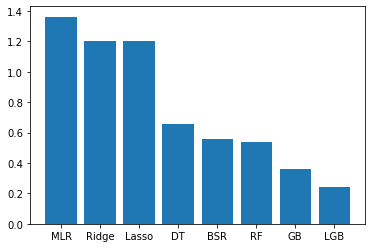

In [106]:
import matplotlib.pyplot as plt
plt.bar(range(len(rmse_dict)), list(rmse_dict.values()), align='center')
plt.xticks(range(len(rmse_dict)), list(rmse_dict.keys()))

From the graph we can see that the non-parametric methods outperform the parametric methods by quite a marging.

The models that performed the best are the ensemble methods, namely the Bootstarp Regressor, Random Forest, Gradient Boosting, and Light Gradient Boosting

While the Gradient Boosting methods do give the best results, these methods are very computationally expensive.  Because of this, there has to be a remarkable improvement in performance to justify these methods.  In this case the use of Gradient Boosting is justified, because the perfomance is much higher than the other methods.

# **FINAL COMMENTS** <a class="anchor" id="Final_Comments"></a>


## **MODEL PREDICTION** <a class="anchor" id="Model_Prediction"></a>


Getting the testing data in the same shape as the training data

In [112]:
df_test.date = pd.to_datetime(df_test.Date)
df_test["Quarter"] = df_test.date.dt.quarter
df_test["Month"] = df_test.date.dt.month
df_test["Year_Month"] = df_test.date.dt.year
df_test = season(df_test)
df_test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Quarter,Month,Season,Year_Month
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0,3,7,Winter,2020
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2,1,1,Summer,2020
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45,3,8,Winter,2020
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8,2,5,Autumn,2020
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19,2,5,Autumn,2020


In [113]:
df_test = df_test.drop('Date', axis=1)

In [114]:
df_test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Quarter,Month,Season,Year_Month
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,128.0,136.0,5008.0,38,456.0,0,3,7,Winter,2020
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,220.0,220.0,1760.0,8,146.4,2,1,1,Summer,2020
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,120.0,120.0,720.0,6,72.0,45,3,8,Winter,2020
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,160.0,160.0,160.0,1,18.3,8,2,5,Autumn,2020
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,140.0,160.0,14140.0,100,1830.0,19,2,5,Autumn,2020


In [115]:
golden_apple_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month,Year_Month,Season
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,150.0,170.0,51710.0,332,6075.6,822,8.51,3,9,2020,Spring
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,50.0,50.0,16000.0,320,3520.0,0,4.55,2,4,2020,Autumn
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,55.0,55.0,990.0,18,162.0,1506,6.11,2,4,2020,Autumn
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,80.0,120.0,32020.0,388,7100.4,443,4.51,2,5,2020,Autumn
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,1800.0,1800.0,1800.0,1,400.0,2,4.50,3,9,2020,Spring


In [116]:
df_test.shape

(685, 16)

In [117]:
golden_apple_train.shape

(1952, 16)

In [118]:
test_ID = df_test['Index']

In [119]:
df_test = df_test.drop('Index', axis=1)

In [120]:
df_test.shape

(685, 15)

In [121]:
X_real = pd.get_dummies(df_test, drop_first=True)
X_real.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Quarter,Month,Year_Month,...,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Season_Spring,Season_Summer,Season_Winter
0,12.0,128.0,136.0,5008.0,38,456.0,0,3,7,2020,...,0,0,0,0,0,0,0,0,0,1
1,18.3,220.0,220.0,1760.0,8,146.4,2,1,1,2020,...,0,1,0,0,0,0,0,0,1,0
2,12.0,120.0,120.0,720.0,6,72.0,45,3,8,2020,...,0,0,0,0,0,0,0,0,0,1
3,18.3,160.0,160.0,160.0,1,18.3,8,2,5,2020,...,0,0,0,0,0,0,0,0,0,0
4,18.3,140.0,160.0,14140.0,100,1830.0,19,2,5,2020,...,0,0,0,0,0,0,0,0,0,0
